<a href="https://colab.research.google.com/github/claireshin17/codestates_projects/blob/main/Section3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
!pip install category_encoders
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import files
warnings.filterwarnings("ignore")

In [255]:
files.upload()
flights = pd.read_excel('train_set.xlsx')

Saving train_set.xlsx to train_set (7).xlsx


In [256]:
flights.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [257]:
flights = flights.drop('Route', axis=1)

In [258]:
flights.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<Figure size 1800x1200 with 0 Axes>

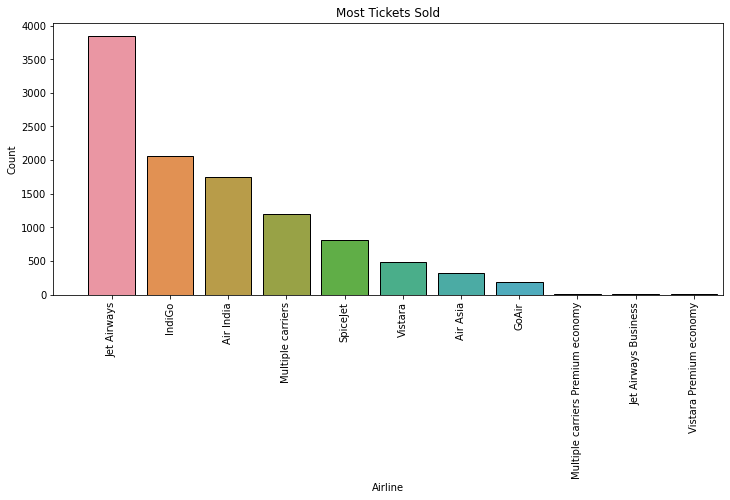

In [259]:
plt.figure(dpi=300)
plt.figure(figsize=(12,5))
sns.countplot(x="Airline", data=flights, order = flights['Airline'].value_counts().index, ec = "black")
font_style={'size':20,'color':'black'}
plt.title("Most Tickets Sold")
plt.ylabel("Count")
plt.xlabel("Airline")
plt.xticks(rotation= 90)
plt.xlim(-1,10.5)
plt.show()

In [260]:
airlines = flights.groupby('Airline').Price.mean()
air_df = airlines.to_frame().sort_values('Price',ascending=False)
air_df

,Price
Airline,
Jet Airways Business,58358.666667
Jet Airways,11643.923357
Multiple carriers Premium economy,11418.846154
Multiple carriers,10902.678094
Air India,9611.210616
Vistara Premium economy,8962.333333
Vistara,7796.348643
GoAir,5861.056701
IndiGo,5673.682903


<Figure size 1800x1200 with 0 Axes>

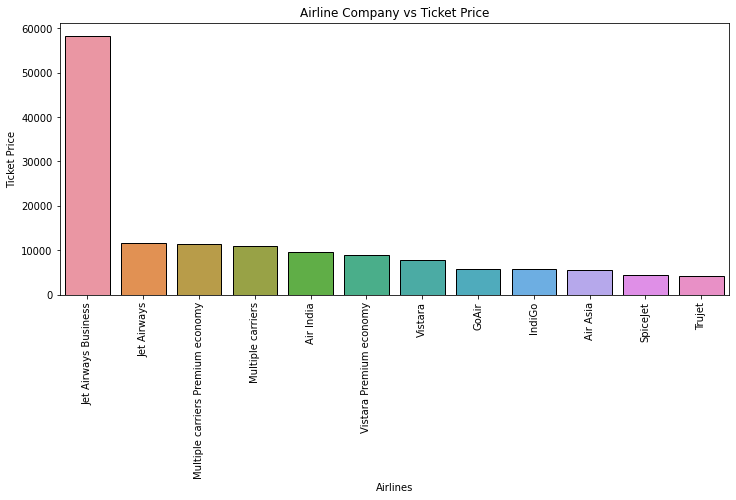

In [261]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(x=air_df.index, y=air_df["Price"], ec = "black")
font_style={'size':20,'color':'black'}
plt.title("Airline Company vs Ticket Price")
plt.ylabel("Ticket Price")
plt.xlabel("Airlines")
plt.xticks(rotation=90)
plt.show()

In [262]:
days = flights[['Airline', 'Date_of_Journey', 'Price']].copy()
days.head()

,Airline,Date_of_Journey,Price
0,IndiGo,24/03/2019,3897
1,Air India,1/05/2019,7662
2,Jet Airways,9/06/2019,13882
3,IndiGo,12/05/2019,6218
4,IndiGo,01/03/2019,13302


In [263]:
days['Date_of_Journey'] = pd.to_datetime(days['Date_of_Journey'], format='%d/%m/%Y')
days['Weekday'] = days['Date_of_Journey'].dt.day_name()
days['Weekend'] = days['Weekday'].apply(lambda day: 1 if day == 'Saturday' or day == 'Sunday' else 0)
days.head()

,Airline,Date_of_Journey,Price,Weekday,Weekend
0,IndiGo,2019-03-24,3897,Sunday,1
1,Air India,2019-05-01,7662,Wednesday,0
2,Jet Airways,2019-06-09,13882,Sunday,1
3,IndiGo,2019-05-12,6218,Sunday,1
4,IndiGo,2019-03-01,13302,Friday,0


<Figure size 1800x1200 with 0 Axes>

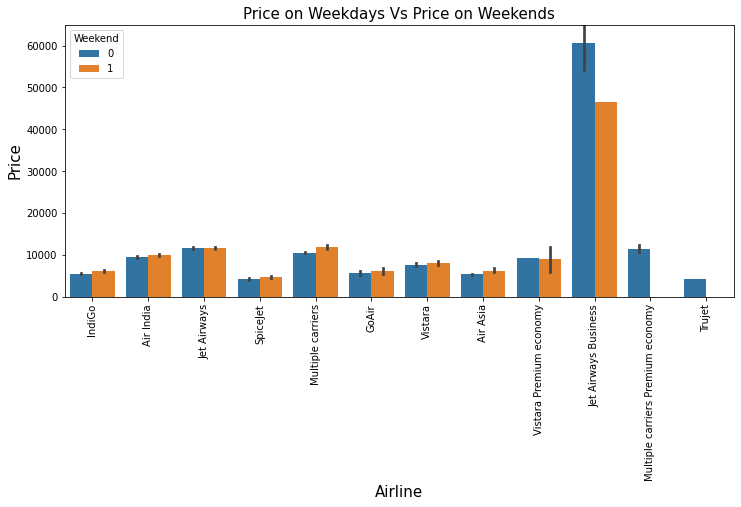

In [264]:
plt.figure(dpi=300)
plt.subplots(figsize=(12,5))
sns.barplot(data=days, x='Airline', y='Price', hue='Weekend')
plt.xlabel("Airline", size = 15)
plt.xticks(rotation = 90)
plt.ylabel("Price", size = 15)
plt.title("Price on Weekdays Vs Price on Weekends", size = 15)
plt.legend(title='Weekend'.title())
plt.ylim(0,65000)
plt.show()

In [265]:
flights = flights.drop(['Date_of_Journey'], axis=1)

In [266]:
flights["Total_Stops"] = flights["Total_Stops"].str.split(" ").str[0]
flights["Total_Stops"] = flights["Total_Stops"].replace("non-stop","0")
flights.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,No info,13302


In [267]:
flights = flights.drop(['Dep_Time','Arrival_Time'], axis=1)

In [268]:
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302


In [269]:
flights["Duration_hr"] = flights["Duration"].str.split('h').str[0]

In [270]:
flights[flights['Duration_hr'].str.contains('m')]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Duration_hr
6474,Air India,Mumbai,Hyderabad,5m,2,No info,17327,5m


In [271]:
flights = flights.drop(6474)

convert to minutes

In [272]:
flights["Duration_min"] = flights["Duration"].str.split(' ').str[1].str.split('m').str[0]
flights['Duration_min'].fillna("0", inplace=True)
flights["Duration"]=(flights["Duration_hr"].astype(int)*60) + flights["Duration_min"].astype(int)
flights = flights.drop(['Duration_hr','Duration_min'],axis=1)
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,170,0,No info,3897
1,Air India,Kolkata,Banglore,445,2,No info,7662
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882
3,IndiGo,Kolkata,Banglore,325,1,No info,6218
4,IndiGo,Banglore,New Delhi,285,1,No info,13302


In [273]:
flights.isnull().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [274]:
flights["Total_Stops"] = flights["Total_Stops"].fillna('1')
flights["Total_Stops"] = flights["Total_Stops"].astype(int)

In [275]:
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,170,0,No info,3897
1,Air India,Kolkata,Banglore,445,2,No info,7662
2,Jet Airways,Delhi,Cochin,1140,2,No info,13882
3,IndiGo,Kolkata,Banglore,325,1,No info,6218
4,IndiGo,Banglore,New Delhi,285,1,No info,13302


In [276]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

for i in ["Airline", "Source", "Destination"]:
    flights[i]=la.fit_transform(flights[i])

flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,170,0,No info,3897
1,1,3,0,445,2,No info,7662
2,4,2,1,1140,2,No info,13882
3,3,3,0,325,1,No info,6218
4,3,0,5,285,1,No info,13302


<Figure size 1800x1200 with 0 Axes>

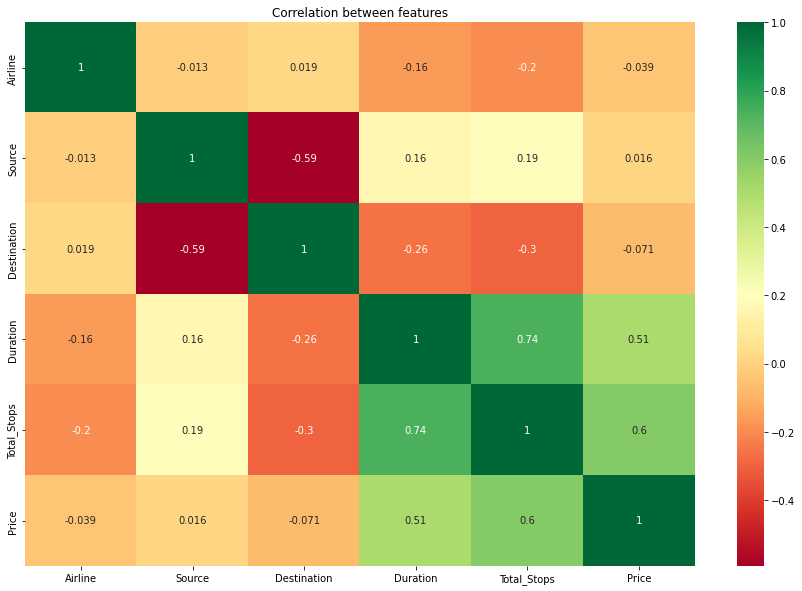

In [277]:
plt.figure(dpi=300)
plt.figure(figsize=(15,10))
sns.heatmap(flights.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation between features")
plt.show()

In [282]:
flights = flights.drop(['Additional_Info'], axis=1)

In [283]:
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Price
0,3,0,5,170,0,3897
1,1,3,0,445,2,7662
2,4,2,1,1140,2,13882
3,3,3,0,325,1,6218
4,3,0,5,285,1,13302


In [284]:
flights.head()

,Airline,Source,Destination,Duration,Total_Stops,Price
0,3,0,5,170,0,3897
1,1,3,0,445,2,7662
2,4,2,1,1140,2,13882
3,3,3,0,325,1,6218
4,3,0,5,285,1,13302


In [285]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [286]:
target = 'Price'
X_train, X_test, y_train, y_test = train_test_split(flights.drop(columns='Price'), flights[target],
                                                    train_size=0.8, test_size=0.2, random_state=2)

In [287]:
X_train.head()

,Airline,Source,Destination,Duration,Total_Stops
9958,6,2,1,470,1
7570,10,1,4,140,0
713,4,3,0,1235,1
885,1,0,2,170,0
6329,4,3,0,960,1


In [288]:
X_test.head()

,Airline,Source,Destination,Duration,Total_Stops
8839,4,0,2,175,0
6183,4,0,5,375,1
4095,4,4,3,85,0
230,1,3,0,1540,1
5712,4,2,1,505,2


In [289]:
y_train.head()

9958     8937
7570    11982
713     10031
885      5228
6329    10844
Name: Price, dtype: int64

In [290]:
y_test.head()

8839     5769
6183    19225
4095     8040
230     14641
5712    15318
Name: Price, dtype: int64

In [291]:
def predict(algorithm):
    model = algorithm.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2 = r2_score(y_test, y_pred)
    print("r2 score: ", r2)
    print('MAE: ', (mean_absolute_error(y_test,y_pred)))
    print('MSE: ', (mean_squared_error(y_test,y_pred)))
    
    return(r2)

In [292]:
dt = predict(DecisionTreeRegressor())

The Predicted Price values are: [ 6257.25       23191.          5544.36923077 ...  6253.07142857
 11667.44444444 15292.        ]


r2 score:  0.5115460905549638
MAE:  1852.011033701853
MSE:  10861292.812664595


In [293]:
rf = predict(RandomForestRegressor())

The Predicted Price values are: [ 6283.38129238 23944.99700125  5545.04822264 ...  6270.95536662
 11691.44188073 14643.        ]


r2 score:  0.5530400522488539
MAE:  1806.7478168702487
MSE:  9938630.389045397
